In [1]:
import pickle
new_data,media_data,a,b,corpus,bow_corpus = pickle.load(open("data_set.p","rb"))

In [2]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# 加载停用词和词形还原器
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
# 去除 URL 和标点符号
media_data['Key Phrases'] = media_data['Key Phrases'].apply(lambda x: re.sub(r"http\S+", "", x)) # 去除 URL
media_data['Key Phrases'] = media_data['Key Phrases'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x)) # 去除标点符号
media_data['Key Phrases'] = media_data['Key Phrases'].apply(lambda x: re.sub(r"@\S+", '', x)) # 删除 @ 符号和用户名
media_data['Key Phrases'] = media_data['Key Phrases'].apply(lambda x: re.sub(r"RT\s+", '', x)) # 删除 RT 标志
media_data['Key Phrases'] = media_data['Key Phrases'].apply(lambda x: re.sub(r"#", '', x)) # 去除#
# media_data['Key Phrases'] = media_data['Key Phrases'].apply(lambda x: re.sub(r"\s+", '', x)) # 去除多余空格

# 将文本转换为小写字母
media_data['Key Phrases'] = media_data['Key Phrases'].apply(lambda x: x.lower())

# 去除停用词
media_data['Key Phrases'] = media_data['Key Phrases'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# 词形还原
media_data['Key Phrases'] = media_data['Key Phrases'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [3]:
bot_data = new_data[new_data['label']==1]
human_data = new_data[new_data['label']==0]

In [4]:
media_text = list(media_data['Key Phrases'])
bot_text = list(bot_data['Hit Sentence'])
human_text = list(human_data['Hit Sentence'])

In [26]:
media_text

['campaign contribution candidate certain telecommunication service commission election season gas industry little attention national attention natural gas newcomer davante lewis obscure regulatory body old progressive policy advocate outside political action committee power public utility runoff seat type contribution unseating boissiere',
 'bolsonaro election rival brazilian football country dictatorship use dynamic football extreme right far right politics general election last two world cup military authority side military dictatorship number player player politics president presidential election regime right wing group side side surprise exit space symbol support team world',
 'republican member abortion abortion right supporter ballot initiative ballot measure candidate citizen initiative decision decision pregnancy draft supreme court opinion drag candidate failure anti abortion ballot measure federal court historically conservative group issue kind abortion right wave law legis

In [35]:
print(len(media_text))
print(len(bot_text))
print(len(human_text))

18135
190586
120363


In [5]:
gun = ['gun','school','child','crime','momsdemand','beto']
info = ['realamvoice','karilake','lake','gapol','coverage','voteblue']
state = ['nevada','arizona','polling','ballot','pennsylvania','vote','voter','candidate','texas']
infla = ['inflation','gas','issue','war','economic','russia']
trump = ['trump','reelect','donald']
abortion = ['race','woman','right','abortion','pegnant']

In [7]:
media_matrix = {'gun':[],'info':[],'state':[],'infla':[],'trump':[],'abortion':[]}
# count = 0
for i in media_text:
    # count+=1
    gun1 = 0
    info1 = 0
    state1 = 0
    infla1 = 0
    trump1 = 0
    abortion1 = 0
    lt1 = i.split()
    for j in lt1:
        if j in gun:
            gun1+=1
        elif j in info:
            info1+=1
        elif j in state:
            state1+=1
        elif j in infla:
            infla1+=1
        elif j in trump:
            trump1+=1
        elif j in abortion:
            abortion1+=1
    media_matrix['gun'].append(gun1)
    media_matrix['info'].append(info1)
    media_matrix['state'].append(state1)
    media_matrix['infla'].append(infla1)
    media_matrix['trump'].append(trump1)
    media_matrix['abortion'].append(abortion1)
    # if count==2:
    #     break

In [9]:
bot_matrix = {'gun':[],'info':[],'state':[],'infla':[],'trump':[],'abortion':[]}
# count = 0
for i in bot_text:
    # count+=1
    gun1 = 0
    info1 = 0
    state1 = 0
    infla1 = 0
    trump1 = 0
    abortion1 = 0
    lt1 = i.split()
    for j in lt1:
        if j in gun:
            gun1+=1
        elif j in info:
            info1+=1
        elif j in state:
            state1+=1
        elif j in infla:
            infla1+=1
        elif j in trump:
            trump1+=1
        elif j in abortion:
            abortion1+=1
    bot_matrix['gun'].append(gun1)
    bot_matrix['info'].append(info1)
    bot_matrix['state'].append(state1)
    bot_matrix['infla'].append(infla1)
    bot_matrix['trump'].append(trump1)
    bot_matrix['abortion'].append(abortion1)
    # if count==2:
    #     break

In [10]:
human_matrix = {'gun':[],'info':[],'state':[],'infla':[],'trump':[],'abortion':[]}
# count = 0
for i in human_text:
    # count+=1
    gun1 = 0
    info1 = 0
    state1 = 0
    infla1 = 0
    trump1 = 0
    abortion1 = 0
    lt1 = i.split()
    for j in lt1:
        if j in gun:
            gun1+=1
        elif j in info:
            info1+=1
        elif j in state:
            state1+=1
        elif j in infla:
            infla1+=1
        elif j in trump:
            trump1+=1
        elif j in abortion:
            abortion1+=1
    human_matrix['gun'].append(gun1)
    human_matrix['info'].append(info1)
    human_matrix['state'].append(state1)
    human_matrix['infla'].append(infla1)
    human_matrix['trump'].append(trump1)
    human_matrix['abortion'].append(abortion1)
    # if count==2:
    #     break

In [50]:
b=0
for i in media_matrix.values():
    a = 0
    for j in i:
        if j!=0:
            a+=1
    b+=a/18135
    print(a/18135)
print(b)

0.1576509511993383
0.032974910394265235
0.4671629445822994
0.22431761786600496
0.34226633581472293
0.38362282878411913
1.6079955886407498


In [51]:
b=0
for i in bot_matrix.values():
    a = 0
    for j in i:
        if j!=0:
            a+=1
    b+=a/190586
    print(a/190586)
print(b)

0.05282129852140241
0.07347863956429118
0.4629616026360803
0.05940100532043277
0.06477915481724786
0.13897138299770181
0.8524130838571564


In [52]:
b=0
for i in human_matrix.values():
    a = 0
    for j in i:
        if j!=0:
            a+=1
    b+=a/120363
    print(a/120363)
print(b)

0.0521505778353813
0.05649576697157765
0.47457275076227745
0.0601181426185788
0.04442395088191554
0.14314199546372225
0.8309031845334531


In [63]:
import time
import pandas as pd
date = []
for i in list(media_data['Date']):
    timeArray = time.strptime(i,"%d-%b-%Y %I:%M%p")
    date.append(timeArray)
date1 = []
for i in date:
    date1.append(time.strftime("%m-%d",i))
media_matrix['date']=date1
df = pd.DataFrame(media_matrix)
df = df.sort_values(by = 'date')

   gun  info  state  infla  trump  abortion   date
0    0     0      1      2      0         0  12-10
1    0     0      0      0      0         3  12-10
2    0     0      7      2      0        10  12-10
3    0     0     10      0      0         2  12-10
4    0     0      4      1      0         0  12-10
       gun  info  state  infla  trump  abortion   date
18134    0     0      0      0      2         0  03-01
18107    0     0      0      0      0         0  03-01
18106    0     0      2      3      0        10  03-01
18105    0     0      0      2      0         0  03-01
18104    0     0      0      0      0         0  03-01


In [83]:
df = pd.DataFrame(media_matrix)
df.mask(df>1,1,inplace=True)
df['date'] = date1
df.groupby('date').sum()

,gun,info,state,infla,trump,abortion
date,,,,,,
03-01,11,0,18,14,18,15
03-02,16,2,25,28,19,19
03-03,16,0,17,16,20,11
03-04,13,1,12,17,26,14
03-05,6,0,8,9,6,7
...,...,...,...,...,...,...
12-06,10,1,41,9,23,35
12-07,17,1,51,11,39,28
12-08,18,1,44,19,30,29


In [72]:
for index, row in df.iterrows():
    print(index)
    print(row)
    for j in row[:-1]:
        if j!=0:
            df.iloc[index,j]=1
    break
df

18134
gun             0
info            0
state           0
infla           0
trump           2
abortion        0
date        03-01
Name: 18134, dtype: object


,gun,info,state,infla,trump,abortion,date
18134,0,0,0,0,2,0,03-01
18107,0,0,0,0,0,0,03-01
18106,0,0,2,3,0,10,03-01
18105,0,0,0,2,0,0,03-01
18104,0,0,0,0,0,0,03-01
...,...,...,...,...,...,...,...
26,0,0,0,0,1,0,12-10
25,0,0,0,0,2,0,12-10
24,0,0,7,3,0,3,12-10
22,0,0,5,0,0,1,12-10


In [14]:
import time
import pandas as pd
def make_csv(data,matrix,name):
    date = []
    for i in list(data['Date']):
        timeArray = time.strptime(i,"%d-%b-%Y %I:%M%p")
        date.append(timeArray)
    date1 = []
    for i in date:
        date1.append(time.strftime("%m-%d",i))
    # matrix['date']=date1
    df = pd.DataFrame(matrix)
    df.mask(df>1,1,inplace=True)
    df['date'] = date1
    df = df.sort_values(by = 'date')
    # new_df = df.groupby('date').sum()
    # new_df.to_csv(name+'.csv',encoding='utf-8')
    return df

In [15]:
media = make_csv(media_data,media_matrix,'media')
bot = make_csv(bot_data,bot_matrix,'bot')
human = make_csv(human_data,human_matrix,'human')

In [26]:
media

,gun,info,state,infla,trump,abortion,date
18134,0,0,0,0,1,0,03-01
18107,0,0,0,0,0,0,03-01
18106,0,0,1,1,0,1,03-01
18105,0,0,0,1,0,0,03-01
18104,0,0,0,0,0,0,03-01
...,...,...,...,...,...,...,...
26,0,0,0,0,1,0,12-10
25,0,0,0,0,1,0,12-10
24,0,0,1,1,0,1,12-10
22,0,0,1,0,0,1,12-10


In [22]:
import numpy as np

In [39]:
def make_np(matrix):
    x = np.zeros((6,6))
    for ind,row in matrix.iterrows():
        lt = row.values
        lt = list(lt[:-1])
        if sum(lt) >1:
            lt1 = [index for (index,value) in enumerate(lt) if value == 1]
            for i in lt1:
                for j in lt1:
                    if i!=j:
                        x[i][j]+=1
    return x

In [41]:
media_np = make_np(media)
bot_np = make_np(bot)
human_np = make_np(human)
bot_np

array([[    0.,   462.,  5185.,   911.,   606.,  1647.],
       [  462.,     0.,  6286.,   519.,  3006.,  1737.],
       [ 5185.,  6286.,     0.,  5298.,  3749., 13170.],
       [  911.,   519.,  5298.,     0.,   949.,  1768.],
       [  606.,  3006.,  3749.,   949.,     0.,  1103.],
       [ 1647.,  1737., 13170.,  1768.,  1103.,     0.]])

In [51]:
media_np1 = np.log(media_np)

C:\Users\user\AppData\Local\Temp\ipykernel_27668\574499133.py:1: RuntimeWarning: divide by zero encountered in log
  media_np1 = np.log(media_np)


In [61]:
media_np2 = media_np*2/sum(media_np)

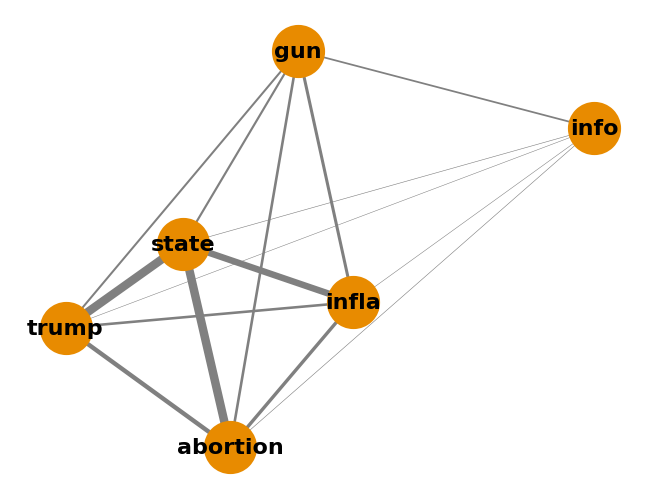

In [89]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 创建Graph对象
G = nx.Graph()

# 添加节点
names = ['gun','info','state','infla','trump','abortion']
for i in range(len(media_np2)):
    G.add_node(names[i])

# 添加边和边权重
for i in range(len(media_np2)):
    for j in range(i, len(media_np2)):
        if media_np2[i][j] > 0:
            G.add_edge(names[i], names[j], weight=media_np2[i][j])

# 设置边权重
edge_width = [d['weight']*7 for (u, v, d) in G.edges(data=True)]
# ['gun','info','state','infla','trump','abortion']
# node_renames = {'1': 'gun', '2': 'info', '3': 'state', '4':'infla','5':'trump','6':'abortion'}
# nx.set_node_attributes(G, node_renames, 'label')

# 绘制加权无向图
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=800, node_color='#e88b00', font_size=16, font_weight='bold', width=edge_width, edge_color='gray')

# 显示图形
plt.show()

In [83]:
bot_np2 = bot_np*2/sum(bot_np)

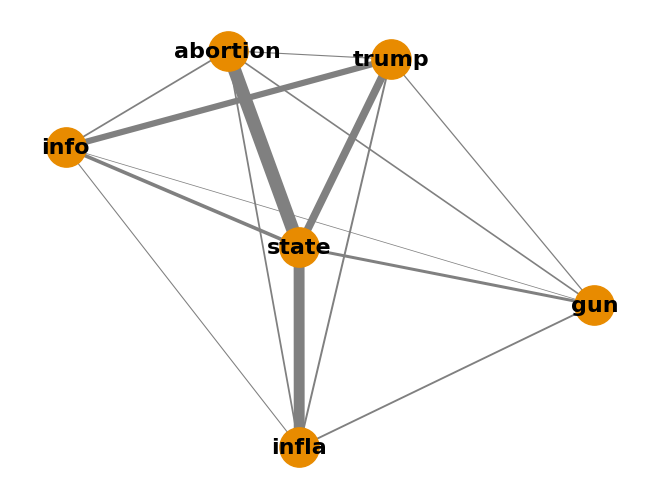

In [85]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 创建Graph对象
G = nx.Graph()

# 添加节点
names = ['gun','info','state','infla','trump','abortion']
for i in range(len(bot_np2)):
    G.add_node(names[i])

# 添加边和边权重
for i in range(len(bot_np2)):
    for j in range(i, len(bot_np2)):
        if bot_np2[i][j] > 0:
            G.add_edge(names[i], names[j], weight=bot_np2[i][j])

# 设置边权重
edge_width = [d['weight']*7 for (u, v, d) in G.edges(data=True)]
# ['gun','info','state','infla','trump','abortion']
# node_renames = {'1': 'gun', '2': 'info', '3': 'state', '4':'infla','5':'trump','6':'abortion'}
# nx.set_node_attributes(G, node_renames, 'label')

# 绘制加权无向图
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=800, node_color='#e88b00', font_size=16, font_weight='bold', width=edge_width, edge_color='gray')

# 显示图形
plt.show()

In [86]:
human_np2 = human_np*2/sum(human_np)

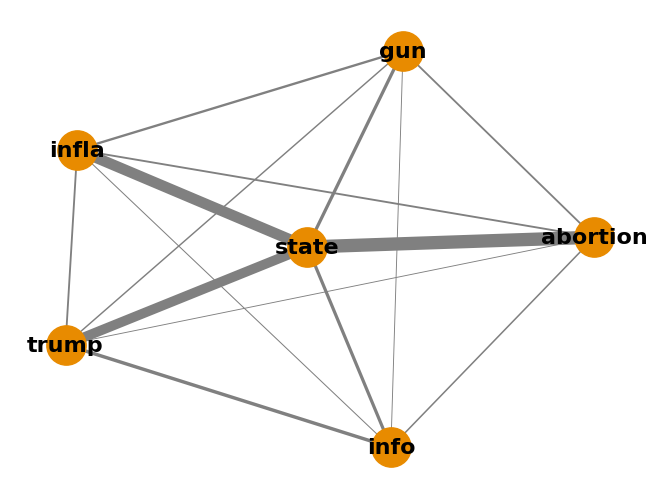

In [87]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 创建Graph对象
G = nx.Graph()

# 添加节点
names = ['gun','info','state','infla','trump','abortion']
for i in range(len(human_np2)):
    G.add_node(names[i])

# 添加边和边权重
for i in range(len(human_np2)):
    for j in range(i, len(human_np2)):
        if human_np2[i][j] > 0:
            G.add_edge(names[i], names[j], weight=human_np2[i][j])

# 设置边权重
edge_width = [d['weight']*7 for (u, v, d) in G.edges(data=True)]
# ['gun','info','state','infla','trump','abortion']
# node_renames = {'1': 'gun', '2': 'info', '3': 'state', '4':'infla','5':'trump','6':'abortion'}
# nx.set_node_attributes(G, node_renames, 'label')

# 绘制加权无向图
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=800, node_color='#e88b00', font_size=16, font_weight='bold', width=edge_width, edge_color='gray')

# 显示图形
plt.show()

In [43]:
pd.DataFrame(media_np).to_csv('media_np.csv')
pd.DataFrame(bot_np).to_csv('bot_np.csv')
pd.DataFrame(human_np).to_csv('human_np.csv')

### 保存数据重开

In [1]:
import pandas as pd
media_new = pd.read_csv('media.csv',encoding='utf-8')
bot_new = pd.read_csv('bot.csv',encoding='utf-8')
human_new = pd.read_csv('human.csv',encoding='utf-8')

In [4]:
test = media_new.head()
test

,date,gun,info,state,infla,trump,abortion
0,03-01,11,0,18,14,18,15
1,03-02,16,2,25,28,19,19
2,03-03,16,0,17,16,20,11
3,03-04,13,1,12,17,26,14
4,03-05,6,0,8,9,6,7


In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import brewer2mpl

In [14]:
def make_pic(test,lab):
    bmap = brewer2mpl.get_map('Set3', 'qualitative', 10)

    colors = bmap.mpl_colors

    fig=plt.figure(figsize=(18,9))

    plt.rcParams['font.sans-serif'] = ['SimHei']

    test['date'] = pd.to_datetime(test['date'],format='%Y-%m-%d')
    plt.stackplot(test['date'], [test['gun'],test['info'],test['state'],test['infla'],test['trump'],test['abortion']], alpha=0.9, colors=colors)
    plt.ylabel(lab)
    # plt.xlabel()
    plt.legend(['gun','info','state','infla','trump','abortion'],loc=2)
    plt.show()

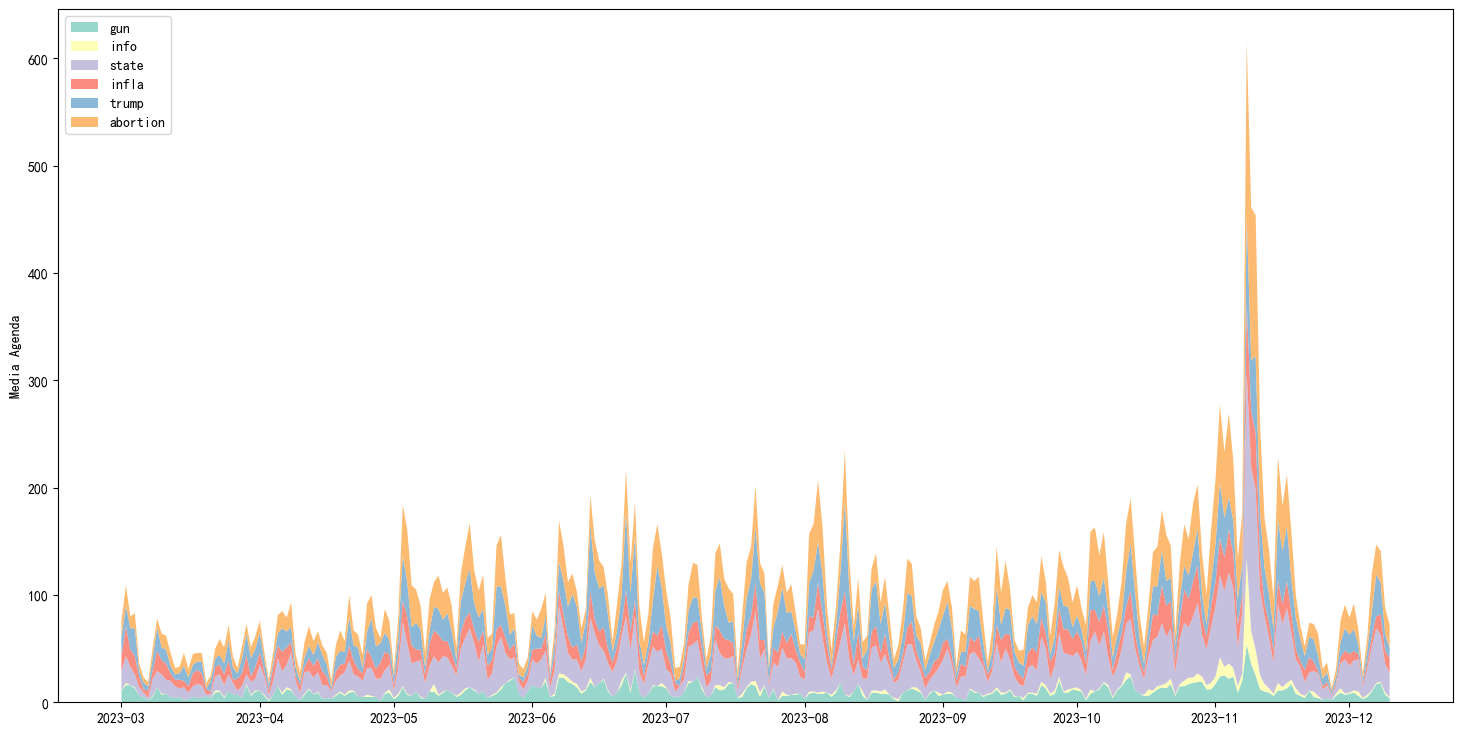

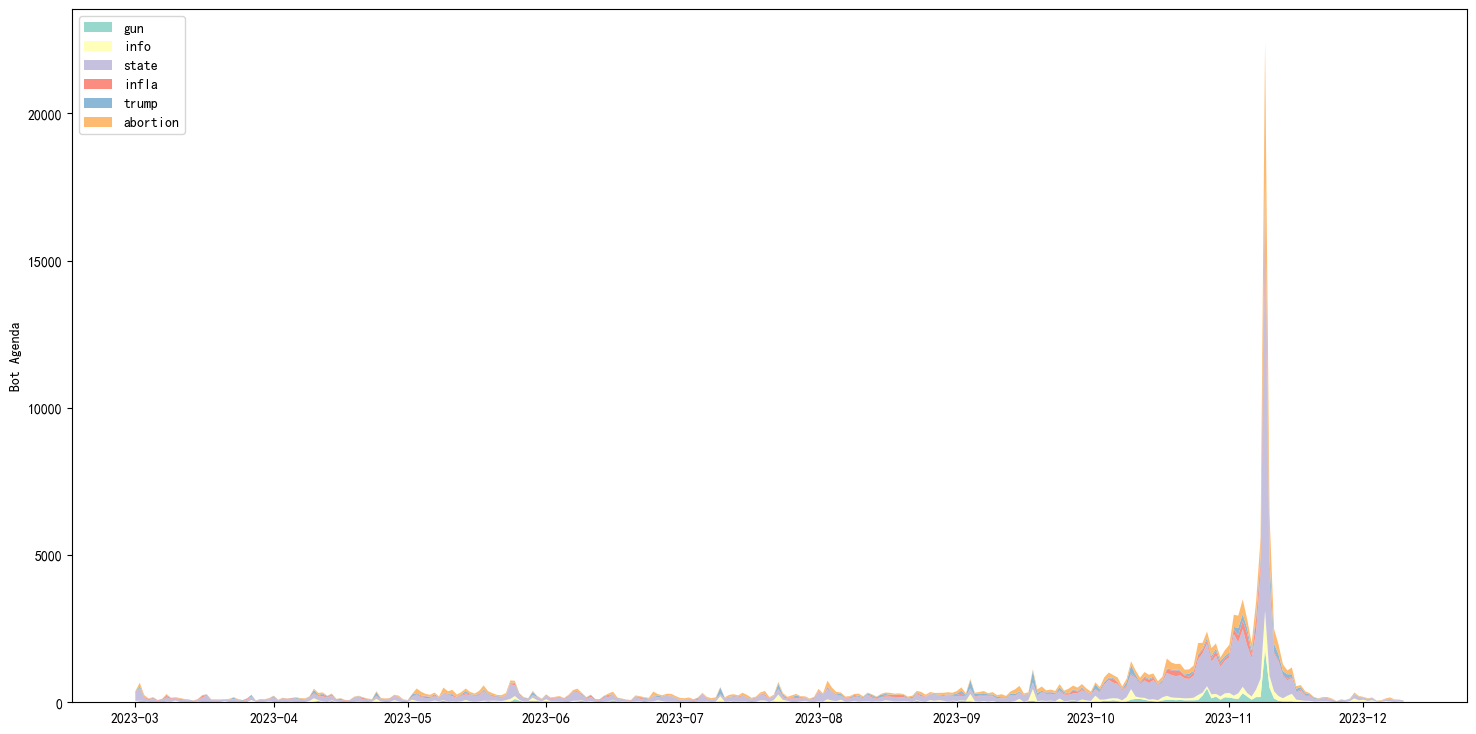

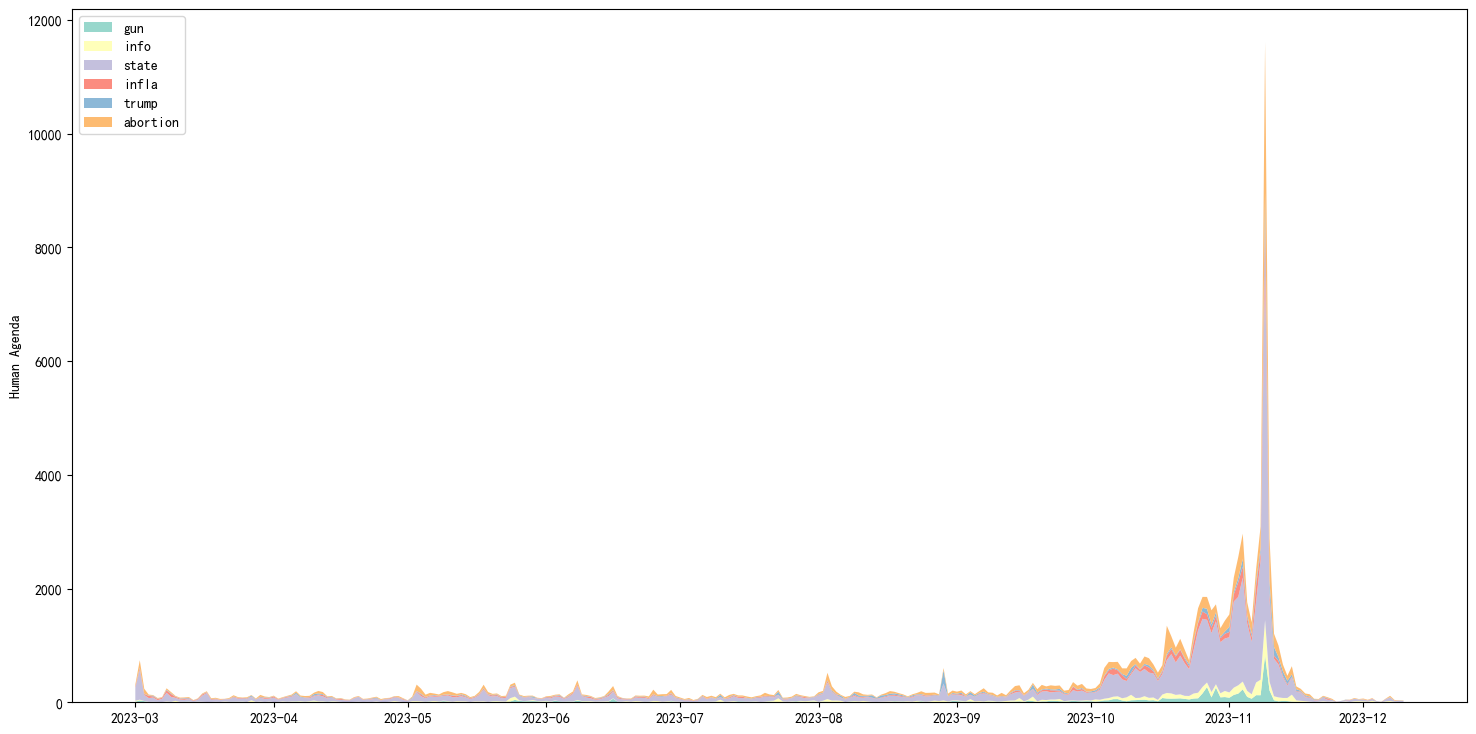

In [15]:
make_pic(media_new,'Media Agenda')
make_pic(bot_new,'Bot Agenda')
make_pic(human_new,'Human Agenda')

In [16]:
import numpy as np

### 相关系数

In [19]:
media_new1 = media_new.melt(id_vars=['date'], var_name='label', value_name='y')
media_new1 = media_new1.groupby('date').sum()
bot_new1 = bot_new.melt(id_vars=['date'], var_name='label', value_name='y')
bot_new1 = bot_new1.groupby('date').sum()
human_new1 = human_new.melt(id_vars=['date'], var_name='label', value_name='y')
human_new1 = human_new1.groupby('date').sum()

C:\Users\user\AppData\Local\Temp\ipykernel_8696\2360025157.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  media_new1 = media_new1.groupby('date').sum()
C:\Users\user\AppData\Local\Temp\ipykernel_8696\2360025157.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bot_new1 = bot_new1.groupby('date').sum()
C:\Users\user\AppData\Local\Temp\ipykernel_8696\2360025157.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hum

In [21]:
media_new1_array = media_new1['y'].values
# media_new1_array
bot_new1_array = bot_new1['y'].values
human_new1_array = human_new1['y'].values

In [27]:
from scipy.stats import pearsonr
print(pearsonr(media_new1_array,bot_new1_array))
print(pearsonr(media_new1_array,human_new1_array))

PearsonRResult(statistic=0.6224421370460096, pvalue=5.771641471823541e-32)
PearsonRResult(statistic=0.6433404040448444, pvalue=1.0825926026242749e-34)


### VAR

In [29]:
## 同日协方差
def correlate(cor):
    print(cor)
    array_media = media_new[cor].values
    array_bot = bot_new[cor].values
    array_human = human_new[cor].values
    print(pearsonr(array_media,array_bot))
    print(pearsonr(array_media,array_human))
    print(pearsonr(array_bot,array_human))
cors = ['gun','info','state','infla','trump','abortion']
for cor in cors:
    correlate(cor)

gun
PearsonRResult(statistic=0.42314045526880883, pvalue=8.287549047411391e-14)
PearsonRResult(statistic=0.4705095965183324, pvalue=4.1736198512797656e-17)
PearsonRResult(statistic=0.9624193656172643, pvalue=3.017459099636795e-162)
info
PearsonRResult(statistic=0.6343963075242143, pvalue=1.6870691780242155e-33)
PearsonRResult(statistic=0.6543358701832857, pvalue=3.256022978256582e-36)
PearsonRResult(statistic=0.9257636236512592, pvalue=1.4876576311081658e-121)
state
PearsonRResult(statistic=0.6571066936605044, pvalue=1.315635935575183e-36)
PearsonRResult(statistic=0.673515338810233, pvalue=5.019783284870636e-39)
PearsonRResult(statistic=0.9740573888295547, pvalue=1.1570206403276956e-184)
infla
PearsonRResult(statistic=0.5453360796031115, pvalue=1.759629552617932e-23)
PearsonRResult(statistic=0.5749148651058064, pvalue=1.7957475707521878e-26)
PearsonRResult(statistic=0.9405329566070938, pvalue=1.0069743170466914e-134)
trump
PearsonRResult(statistic=0.2360783521026926, pvalue=5.697929881

In [34]:
media_new

,date,gun,info,state,infla,trump,abortion
0,2023-03-01,11,0,18,14,18,15
1,2023-03-02,16,2,25,28,19,19
2,2023-03-03,16,0,17,16,20,11
3,2023-03-04,13,1,12,17,26,14
4,2023-03-05,6,0,8,9,6,7
...,...,...,...,...,...,...,...
280,2023-12-06,10,1,41,9,23,35
281,2023-12-07,17,1,51,11,39,28
282,2023-12-08,18,1,44,19,30,29
283,2023-12-09,7,2,27,12,16,24


In [37]:
df = pd.merge(media_new,bot_new,on=['date'])
df = pd.merge(df,human_new,on=['date'])
df

,date,gun_x,info_x,state_x,infla_x,trump_x,abortion_x,gun_y,info_y,state_y,infla_y,trump_y,abortion_y,gun,info,state,infla,trump,abortion
0,2023-03-01,11,0,18,14,18,15,14,31,265,27,6,34,10,17,228,18,5,31
1,2023-03-02,16,2,25,28,19,19,41,12,419,23,64,106,33,13,518,29,17,130
2,2023-03-03,16,0,17,16,20,11,48,1,97,19,18,61,20,3,106,16,6,87
3,2023-03-04,13,1,12,17,26,14,7,4,70,35,0,15,4,3,67,38,6,17
4,2023-03-05,6,0,8,9,6,7,5,1,102,28,21,18,9,1,73,21,14,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,2023-12-06,10,1,41,9,23,35,2,41,55,1,5,25,0,16,34,5,3,6
281,2023-12-07,17,1,51,11,39,28,7,23,86,2,4,45,4,19,60,2,5,24
282,2023-12-08,18,1,44,19,30,29,7,10,46,5,7,21,5,4,17,2,1,12
283,2023-12-09,7,2,27,12,16,24,2,22,53,4,4,6,1,4,18,3,5,4


In [39]:
df.to_csv('last.csv',encoding='utf-8')
